In [1]:
# Diabetes Prediction Project. 
## The dataset's target column is highly imbalanced so i needed to use BalancedRandomForestClassifier
## together with GridSearchCV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



In [3]:
df = pd.read_csv('../diabetes_prediction_dataset.csv')

df.shape

(100000, 9)

In [5]:
df.head(27)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## The plot clearly shows the imbalanced distribution of the main predictive feature: 92% of individuals do not have diabetes (0).¶

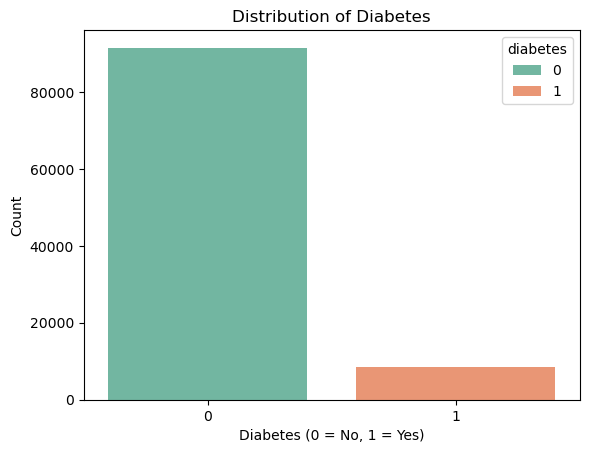

In [7]:
sns.countplot(x='diabetes', data=df, hue='diabetes', palette='Set2') #you can use also hue='gender'
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Check general info of dataframe data. The output shows that we don't have null values in any of the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Transform string columns into numeric with get_dummies

In [11]:
df = pd.get_dummies(df).astype(int)

## Check what we have now after numeric transformation

In [13]:
df.head(3)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25,6,140,0,1,0,0,0,0,0,0,1,0
1,54,0,0,27,6,80,0,1,0,0,1,0,0,0,0,0
2,28,0,0,27,5,158,0,0,1,0,0,0,0,0,1,0


In [15]:
df.shape

(100000, 16)

## Separate Features and Target

In [17]:
y = df['diabetes']
X = df.drop(columns=['diabetes'])

#checking shapes data of y and X

In [19]:
df.head(27)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25,6,140,0,1,0,0,0,0,0,0,1,0
1,54,0,0,27,6,80,0,1,0,0,1,0,0,0,0,0
2,28,0,0,27,5,158,0,0,1,0,0,0,0,0,1,0
3,36,0,0,23,5,155,0,1,0,0,0,1,0,0,0,0
4,76,1,1,20,4,155,0,0,1,0,0,1,0,0,0,0
5,20,0,0,27,6,85,0,1,0,0,0,0,0,0,1,0
6,44,0,0,19,6,200,1,1,0,0,0,0,0,0,1,0
7,79,0,0,23,5,85,0,1,0,0,1,0,0,0,0,0
8,42,0,0,33,4,145,0,0,1,0,0,0,0,0,1,0
9,32,0,0,27,5,100,0,1,0,0,0,0,0,0,1,0


In [21]:
X.head(27)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25,6,140,1,0,0,0,0,0,0,1,0
1,54,0,0,27,6,80,1,0,0,1,0,0,0,0,0
2,28,0,0,27,5,158,0,1,0,0,0,0,0,1,0
3,36,0,0,23,5,155,1,0,0,0,1,0,0,0,0
4,76,1,1,20,4,155,0,1,0,0,1,0,0,0,0
5,20,0,0,27,6,85,1,0,0,0,0,0,0,1,0
6,44,0,0,19,6,200,1,0,0,0,0,0,0,1,0
7,79,0,0,23,5,85,1,0,0,1,0,0,0,0,0
8,42,0,0,33,4,145,0,1,0,0,0,0,0,1,0
9,32,0,0,27,5,100,1,0,0,0,0,0,0,1,0


## Split on train / test subsets, train model

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # More trees for better ensemble
    'max_depth': [5, 10, 20, None],  # Allow deeper trees
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Grid search with explicit future-safe parameters
grid = GridSearchCV(
    estimator=BalancedRandomForestClassifier(
        random_state=42,
        sampling_strategy='auto',   
        replacement=False,          
        bootstrap=True              
    ),
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # tried also 'roc_auc' or 'recall' but they did not work well
    n_jobs=-1
)

# Fit the model
grid.fit(X_train, y_train)

# Get best model
best_model = grid.best_estimator_

# Predict
y_pred = best_model.predict(X_test)


## predict and accuracy, and as a bonus to us show the predictions of first 5 records in test set,
## to check real performance of model

In [25]:
print(best_model)
print(np.unique(best_model.predict(X_test), return_counts=True))
print(best_model.predict_proba(X_test[:5]))

BalancedRandomForestClassifier(bootstrap=True, max_depth=5, n_estimators=50,
                               random_state=42, replacement=False,
                               sampling_strategy='auto')
(array([0, 1]), array([21079,  3921]))
[[0.86793237 0.13206763]
 [0.86592486 0.13407514]
 [0.71921174 0.28078826]
 [0.83161385 0.16838615]
 [0.61194058 0.38805942]]


In [27]:
print(accuracy_score(y_test, y_pred))

0.90812


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     22850
           1       0.48      0.88      0.62      2150

    accuracy                           0.91     25000
   macro avg       0.73      0.89      0.78     25000
weighted avg       0.94      0.91      0.92     25000



In [31]:
print(confusion_matrix(y_test, y_pred))

[[20816  2034]
 [  263  1887]]


In [33]:
joblib.dump(best_model, '../model/diabetes_model.pkl')

['../model/diabetes_model.pkl']